In [84]:
import pandas as pd

In [85]:
df = pd.read_csv('adult.csv')

In [86]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [87]:
df_ent = pd.read_html("https://en.wikipedia.org/wiki/Password_strength")

In [88]:
df_ent[0].to_csv("PasswardStength.csv", encoding = 'ansi')

In [89]:
df_ent[0]

,Symbol set,Symbol countN,Entropy per symbolH
0,Arabic numerals (0–9) (e.g. PIN),10,3.322 bits
1,"Hexadecimal numerals (0–9, A–F) (e.g. WEP keys)",16,4.000 bits
2,Case insensitive Latin alphabet (a–z or A–Z),26,4.700 bits
3,"Case insensitive alphanumeric (a–z or A–Z, 0–9)",36,5.170 bits
4,"Case sensitive Latin alphabet (a–z, A–Z)",52,5.700 bits
5,"Case sensitive alphanumeric (a–z, A–Z, 0–9)",62,5.954 bits
6,All ASCII printable characters except space,94,6.555 bits
7,All Latin-1 Supplement characters,94,6.555 bits
8,All ASCII printable characters,95,6.570 bits
9,All extended ASCII printable characters,218,7.768 bits


In [90]:
df_ent[1]

Desired passwordentropy H Arabicnumerals Hexadecimal Case insensitive  \
   Desired passwordentropy H Arabicnumerals Hexadecimal    Latinalphabet   
0            8 bits (1 byte)              3           2                2   
1          32 bits (4 bytes)             10           8                7   
2          40 bits (5 bytes)             13          10                9   
3          64 bits (8 bytes)             20          16               14   
4         80 bits (10 bytes)             25          20               18   
5         96 bits (12 bytes)             29          24               21   
6        128 bits (16 bytes)             39          32               28   
7        160 bits (20 bytes)             49          40               35   
8        192 bits (24 bytes)             58          48               41   
9        224 bits (28 bytes)             68          56               48   
10       256 bits (32 bytes)             78          64               55   

                 Case sensitive                          All ASCII  \
   alpha-numeric  Latinalphabet alpha-numeric printable characters   
0              2              2             2                    2   
1              7              6             6                    5   
2              8              8             7                    7   
3             13             12            11                   10   
4             16             15            14                   13   
5             19             17            17                   15   
6             25             23            22                   20   
7             31             29            27                   25   
8             38             34            33                   30   
9             44             40            38                   35   
10            50             45            43                   39   

      All ExtendedASCII Dicewareword list  
   printable characters Dicewareword list  
0                     2            1 word  
1                     5           3 words  
2                     6           4 words  
3                     9           5 words  
4                    11           7 words  
5                    13           8 words  
6                    17          10 words  
7                    21          13 words  
8                    25          15 words  
9                    29          18 words  
10                   33          20 words

#### Evaluation of the strength of a password

In [91]:
#!pip install namegenerator

### Generate Data

#### Create Random Password with Special characters, letters, and digits

> A password that contains a combination of characters, digits, and special symbols is considered a strong password.

In [92]:
import random
'''Function to randomly convert a letter t uppercase'''

def randomcase(s):
    result = ''
    for c in s:
        case = random.randint(1, 2)
        if case != 0:
            result += c.upper()
        else:
            result += c.lower()
    return result
'''Function to obtain random users and passwords'''
def PassUsers(n):
    import random
    import string
    import namegenerator
    import secrets
    '''Parameters: n = Sample size
                    chars = Number of numerals and special characters to generate
    
    
    '''
    #Ensure the number of characters is 3

    psws = []
    usrss = []
    for i in range(n):
        # Get the names of a user
        usrs = namegenerator.gen()
        usrss.append(usrs)
        #get username
        first = usrs.split('-')[0][0:random.randint(4, 6)]

        last = randomcase(usrs.split('-')[-1][0:random.randint(4, 6)])

        userName = first + last
        #passwords
        # get random password pf length 10 with letters, digits, and symbols
        characters =  string.digits + string.punctuation

        from more_itertools import random_permutation

        char = random.choice(string.punctuation)
        num = random.choice(string.digits)
        char1 = random.choice(string.punctuation)
        num1 = random.choice(string.digits)
        alpha = char+num+char+num

        alpha = ''.join(random_permutation(alpha))
        psw = ''.join((secrets.choice(characters) for i in range(random.randint(4, 6))))
        #combine chars and name
        psw = userName + alpha
        psws.append(psw)
    return usrss, psws

In [93]:
users, pswds = PassUsers(10)
pswds

['thirPARADI0]]0',
 'sicklyCAIMAN66((',
 'stinkySCORP2@2@',
 'skinBURME0&0&',
 'dorkyMALTE2]2]',
 'beadFLAMI4<4<',
 'hillROBI00==',
 'greasBURM\\\\44',
 'flakyBUZZAR_4_4',
 'sleepyMOLE99//']

In [94]:
import re
import string
import collections as ct
def entropy(password):
    #count number of numerals 
    num_chars = string.digits
    nums = sum(v for k, v in ct.Counter(password).items() if k in num_chars)
    #count number of special characters
    special_chars = string.punctuation
    chars = sum(v for k, v in ct.Counter(password).items() if k in special_chars)
    #count number of lower case letters
    lowers = len(re.sub("[^a-z]", "", password))
    #count number of capital letters
    caps = len(re.sub("[^A-Z]", "", password))
    '''Compute entropy'''
    import math
    #Constants

    log_2 = math.log(2)
    capN = 26
    smallN = 26
    numN = 10
    SymbolCountN = 62
    special = 32
    CountN = SymbolCountN + special

    length_of_password = len(password)
    no_of_pos_chars = 26
    #get user name
    a, b,c = users[0].replace("'","").split("-")
    #first name
    name1 = a
    name2 = b
    name3 = c

    entropy = round(length_of_password*(math.log(CountN))/math.log(2), 1)
    return nums, chars, lowers, caps, entropy

##### Compute Entropy for passwords from a single experiment

In [95]:
def experi(N):
    users, pswds = PassUsers(N)
    perf = pd.DataFrame([entropy(ps) for ps in pswds],
              columns = ['Numerical Characters', 'Special Characters', 'Lower Case Characters', 'Uppercase Characters ', 'Entropy'])
    perf['Username'] = users
    perf['Password'] = pswds
    H = perf
    strong = len(H[H['Entropy'] >= 78])
    weak = len(H[H['Entropy'] < 78])
    tot = strong+weak
    strong_ = round((strong*100/tot),2)
    weak_ = round((weak*100/tot), 2)
    return strong_, weak_, H

In [96]:
#generate sample passwords and usernames
strong1, weak1, H = experi(10)
#H.drop('Entropy', axis = 1).to_csv('sample.csv')

#### 100 Users

In [121]:
strong1, weak1, H = experi(100)
#performance

print('Percentage of strong passwords', strong1, "%")
print('Percentage of weak passwords', weak1, "%")

H.head()

Percentage of strong passwords 96.0 %
Percentage of weak passwords 4.0 %


,Numerical Characters,Special Characters,Lower Case Characters,Uppercase Characters,Entropy,Username,Password
0,2,2,5,5,91.8,bluesy-asparagus-tapir,bluesTAPIR3<<3
1,2,2,4,4,78.7,squirrely-linen-worm,squiWORM77&&
2,2,2,5,5,91.8,leaky-cornflower-spitz,leakySPITZ@44@
3,2,2,4,6,91.8,chummy-tan-donkey,chumDONKEY8*8*
4,2,2,6,5,98.3,trippy-turquoise-neanderthal,trippyNEAND**77


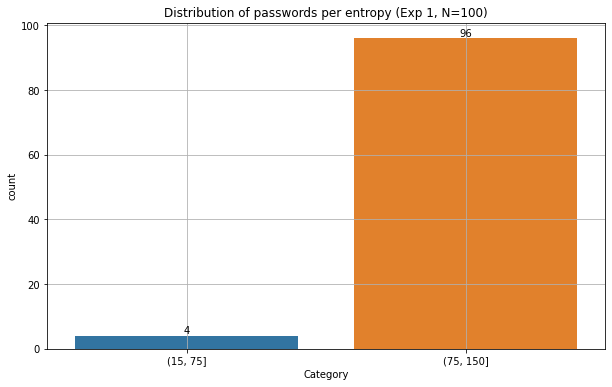

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
#create bins to get the distribution of entropy
bins = [15,75, 150]
plt.rcParams['figure.figsize'] = 10, 6
H['Category'] = pd.cut(H['Entropy'], bins)

chart = sns.countplot(data = H, x = 'Category')
chart.bar_label(chart.containers[0])
plt.title("Distribution of passwords per entropy (Exp 1, N="+str(len(H))+")")
plt.grid()
plt.show()

In [123]:
import plotly.express as px
fig = px.box(H, y="Entropy", title = "Entropy distribution when N = 100")
fig.show()

#### 200 Users

In [100]:
strong2, weak2, H = experi(200)
#performance

print('Percentage of strong passwords', strong2, "%")
print('Percentage of weak passwords', weak2, "%")

H.head()

Percentage of strong passwords 98.5 %
Percentage of weak passwords 1.5 %


,Numerical Characters,Special Characters,Lower Case Characters,Uppercase Characters,Entropy,Username,Password
0,2,2,4,4,78.7,gummy-harlequin-coyote,gummCOYO_5_5
1,2,2,5,3,78.7,leaky-chartreuse-tzu,leakyTZU22<<
2,2,2,5,6,98.3,bluesy-cinnamon-wildebeest,"bluesWILDEB7""""7"
3,2,2,5,4,85.2,pokey-rose-sloth,pokeySLOT!!22
4,2,2,6,6,104.9,sleazy-mustard-iguana,sleazyIGUANA++88


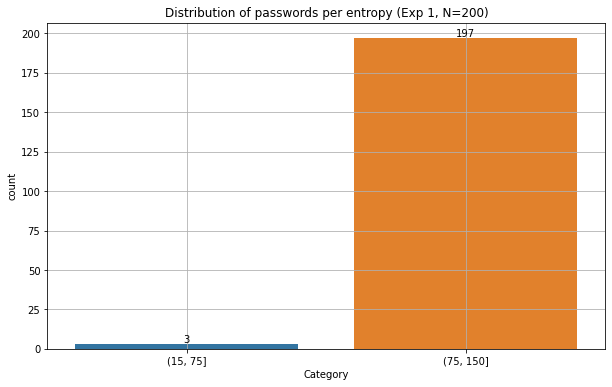

In [101]:
import matplotlib.pyplot as plt
#create bins to get the distribution of entropy
bins = [15,75, 150]
plt.rcParams['figure.figsize'] = 10, 6
H['Category'] = pd.cut(H['Entropy'], bins)

chart = sns.countplot(data = H, x = 'Category')
chart.bar_label(chart.containers[0])
plt.title("Distribution of passwords per entropy (Exp 1, N="+str(len(H))+")")
plt.grid()
plt.show()

In [102]:
import plotly.express as px
fig = px.box(H, y="Entropy")
fig.show()

#### 300 Users

In [103]:
strong3, weak3, H = experi(300)
#performance

print('Percentage of strong passwords', strong3, "%")
print('Percentage of weak passwords', weak3, "%")

H.head()

Percentage of strong passwords 98.33 %
Percentage of weak passwords 1.67 %


,Numerical Characters,Special Characters,Lower Case Characters,Uppercase Characters,Entropy,Username,Password
0,2,2,5,4,85.2,foggy-tan-toad,foggyTOAD1\\1
1,2,2,6,5,98.3,breezy-olivine-warthog,breezyWARTH//88
2,2,2,4,6,91.8,cloudy-ecru-peccary,clouPECCAR11..
3,2,2,4,5,85.2,lanky-lemon-mouse,lankMOUSE$$77
4,2,2,5,6,98.3,squirrely-auburn-quokka,squirQUOKKA11##


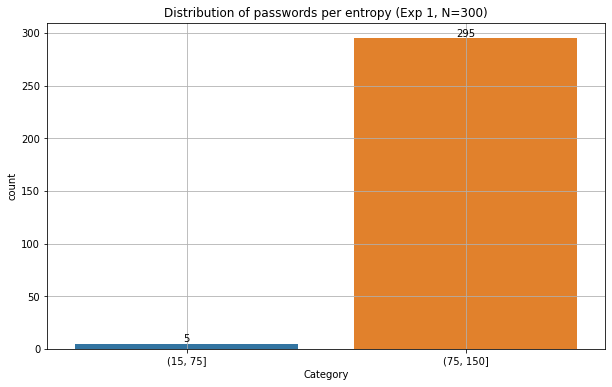

In [104]:
import matplotlib.pyplot as plt
#create bins to get the distribution of entropy
bins = [15,75, 150]
plt.rcParams['figure.figsize'] = 10, 6
H['Category'] = pd.cut(H['Entropy'], bins)

chart = sns.countplot(data = H, x = 'Category')
chart.bar_label(chart.containers[0])
plt.title("Distribution of passwords per entropy (Exp 1, N="+str(len(H))+")")
plt.grid()
plt.show()

In [105]:
import plotly.express as px
fig = px.box(H, y="Entropy")
fig.show()

#### 400 Users

In [106]:
strong4, weak4, H = experi(400)
#performance

print('Percentage of strong passwords', strong4, "%")
print('Percentage of weak passwords', weak4, "%")

H.head()

Percentage of strong passwords 98.5 %
Percentage of weak passwords 1.5 %


,Numerical Characters,Special Characters,Lower Case Characters,Uppercase Characters,Entropy,Username,Password
0,2,2,5,4,85.2,wiggy-black-uguisu,wiggyUGUI]2]2
1,2,2,5,4,85.2,homely-grey-fish,"homelFISH""""77"
2,2,2,5,4,85.2,zippy-cerulean-dragonfly,zippyDRAG3@@3
3,2,2,5,5,91.8,sunny-bistre-caracal,sunnyCARAC22}}
4,2,2,5,4,85.2,boozy-ultramarine-dugong,boozyDUGO.0.0


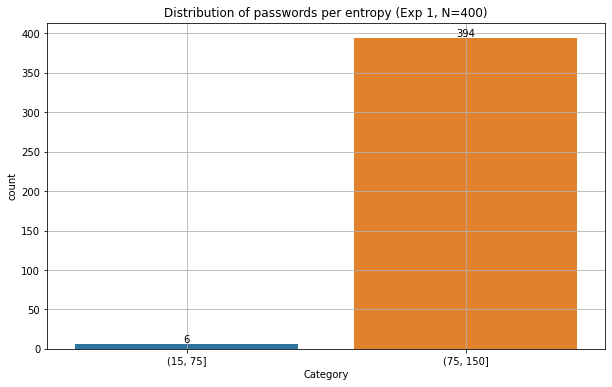

In [107]:
import matplotlib.pyplot as plt
#create bins to get the distribution of entropy
bins = [15,75, 150]
plt.rcParams['figure.figsize'] = 10, 6
H['Category'] = pd.cut(H['Entropy'], bins)

chart = sns.countplot(data = H, x = 'Category')
chart.bar_label(chart.containers[0])
plt.title("Distribution of passwords per entropy (Exp 1, N="+str(len(H))+")")
plt.grid()
plt.show()

In [108]:
import plotly.express as px
fig = px.box(H, y="Entropy")
fig.show()

#### 500 Users

In [171]:
strong5, weak5, H = experi(500)
#performance
print('Percentage of strong passwords', strong5, "%")
print('Percentage of weak passwords', weak5, "%")

Percentage of strong passwords 99.4 %
Percentage of weak passwords 0.6 %


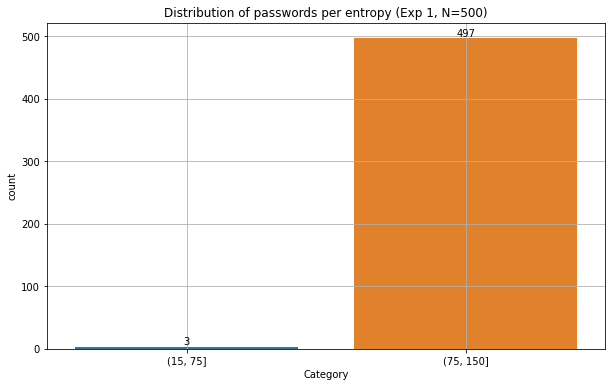

In [172]:
import matplotlib.pyplot as plt
#create bins to get the distribution of entropy
bins = [15,75, 150]
plt.rcParams['figure.figsize'] = 10, 6
H['Category'] = pd.cut(H['Entropy'], bins)

chart = sns.countplot(data = H, x = 'Category')
chart.bar_label(chart.containers[0])
plt.title("Distribution of passwords per entropy (Exp 1, N="+str(len(H))+")")
plt.grid()
plt.show()

In [174]:
import plotly.express as px
fig = px.box(H, y="Entropy", title = "Entropy distribution when N = 500")
fig.show()

##### Password Strength per number of users

In [113]:
experiment = ['One', 'Two', 'Three', 'Four', 'Five']

perc = [strong1, strong2, strong3, strong4, strong5]

overall = pd.DataFrame()
overall['Experiment'] = experiment
overall['Percentage of strong websites'] = perc
overall

,Experiment,Percentage of strong websites
0,One,96.00
1,Two,98.50
2,Three,98.33
3,Four,98.50
4,Five,99.20


##### Replicate over 50 experiments with an increase in 1000 users

In [114]:
%%time
import numpy as np
exps = np.arange(1000,51000, 1000).tolist()
strong = []
for N in exps:
    strong4, weak4, H = experi(N)
    strong.append(strong4)


Wall time: 3min 44s


In [115]:
print("Number of passwords tested:",sum(exps))

Number of passwords tested: 1275000


In [118]:
experiment = pd.DataFrame()
experiment['Number of users'] = exps
experiment['Percentage of strong passwords'] = strong
fig = px.box(experiment, y="Percentage of strong passwords",
             title="Percentage of strong passwords using the proposed policy"+'(number of experiments ='+str(len(exps))+")")
fig.show()